In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

In [4]:
df.set_index('date', inplace=True)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


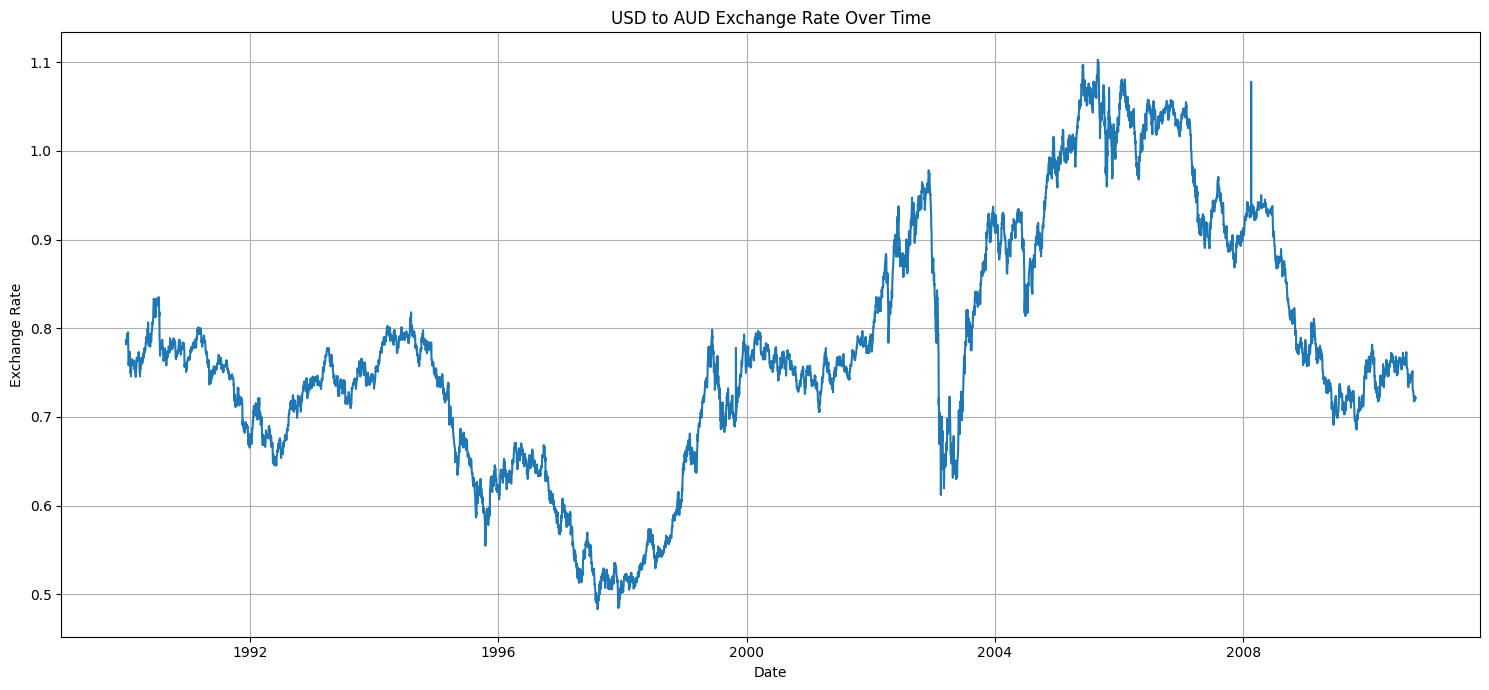

In [5]:
# Exploring the time series
plt.figure(figsize=(15,7))
plt.plot(df.index, df['Ex_rate'])
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.tight_layout()
plt.grid(True)
plt.show()

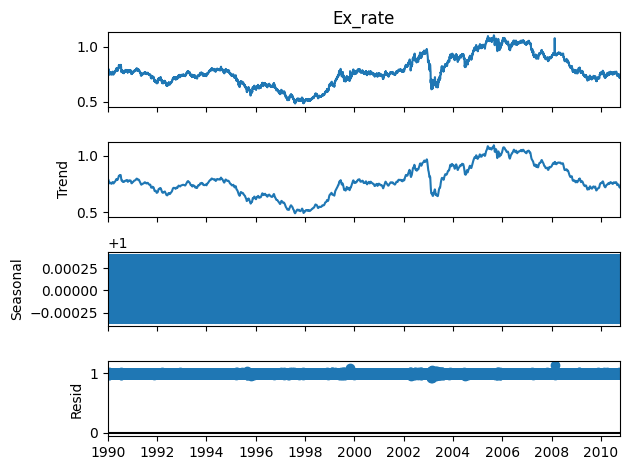

In [6]:
# Checking for Trend, Seasonality and Residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Ex_rate,period=12, model='multiplicative')
decompose_ts_add.plot()
plt.show()

In [7]:
# Augmented Dickey-Fuller (ADF) test for Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] < 0.05

check_stationarity(df.Ex_rate)

ADF Statistic: -1.6649941807381392
p-value: 0.44923273535979713


np.False_

In [8]:
# Preprocessing data
def preprocess_data(df):
    # Handling missing values
    df['Ex_rate'] = df['Ex_rate'].interpolate(method='linear')
    # Checking for stationarity
    if not check_stationarity(df['Ex_rate']):
        df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()
    return df

preprocess_data(df)

ADF Statistic: -1.6649941807381392
p-value: 0.44923273535979713


,Ex_rate,Ex_rate_diff
date,,
1990-01-01,0.785500,NaN
1990-01-02,0.781800,-0.003700
1990-01-03,0.786700,0.004900
1990-01-04,0.786000,-0.000700
1990-01-05,0.784900,-0.001100
...,...,...
2010-10-06,0.718494,-0.000207
2010-10-07,0.721839,0.003345
2010-10-08,0.723197,0.001358


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [10]:
train_size = 0.8
train_len = int(len(df.Ex_rate) * train_size)
train, test = df.Ex_rate[:train_len], df.Ex_rate[train_len:]

Text(0.5, 1.0, 'PACF Plot')

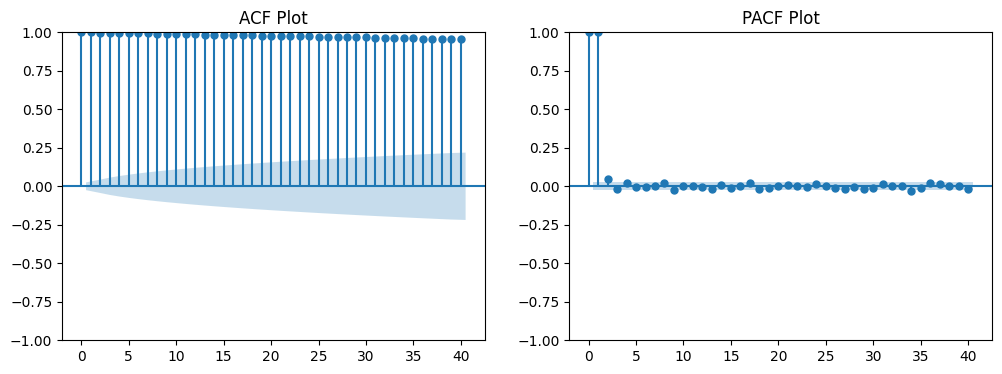

In [11]:
# Plotting ACF and PACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(train.dropna(), lags=40, ax=plt.gca())
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(train.dropna(), lags=40, ax=plt.gca())
plt.title('PACF Plot')

In [12]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(train, start_p = 1, start_q = 1, 
                      max_p = 3, max_q = 3, m = 12, start_P = 0, d = 1,
                     seasonal = True, D = 1, trace = True,
                     error_action='ignore', suppress_warnings = True, stepwise = True)

stepwise_fit.summary()

/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=12.89 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-41174.187, Time=0.64 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-42902.452, Time=2.67 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.42 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-41189.941, Time=0.31 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-43515.275, Time=3.62 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.05 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.12 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-43502.121, Time=3.42 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-43514.972, Time=4.88 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-43520.969, Time=4.15 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-42906.063, Time=1.60 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=16.22 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=9.83 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-43514.783, Time=3.35 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-43496.128, Time=5.32 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,1,0)[12]             : AIC=-43518.766, Time=7.29 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,1,0)[12]             : AIC=-43513.693, Time=4.04 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,1,0)[12]             : AIC=-43517.957, Time=4.47 sec


/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12] intercept   : AIC=-43518.973, Time=24.00 sec

Best model:  ARIMA(1,1,1)(2,1,0)[12]          
Total fit time: 136.326 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 6070
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               21765.484
Date:                             Mon, 08 Sep 2025   AIC                         -43520.969
Time:                                     16:03:18   BIC                         -43487.424
Sample:                                 01-01-1990   HQIC                        -43509.325
                                      - 08-14-2006                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5590      0.081     -6.864      0.000      -0.719      -0.399
ma.L1          0.5061      0.084      6.021      0.000       0.341       0.671
ar.S.L12      -0.6511      0.006   -115.400      0.000      -0.662      -0.640
ar.S.L24      -0.3122      0.007    -42.223      0.000      -0.327      -0.298
sigma2      4.418e-05   3.21e-07    137.509      0.000    4.36e-05    4.48e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             36054.17
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               3.81   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
def arima_model_fitting(training_data):
    model = ARIMA(training_data, order=(1, 1, 1), seasonal_order=(2, 1, 0, 12))
    model_fit = model.fit()

    # Diagnostics
    residuals = model_fit.resid
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(residuals)
    plt.title('Residuals')
    plt.subplot(122)
    plot_acf(residuals, lags=40, ax=plt.gca())
    plt.title('Residuals ACF')
    
    # Forecasting
    forecast = model_fit.forecast(steps=len(test))
    return train, test, forecast

/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


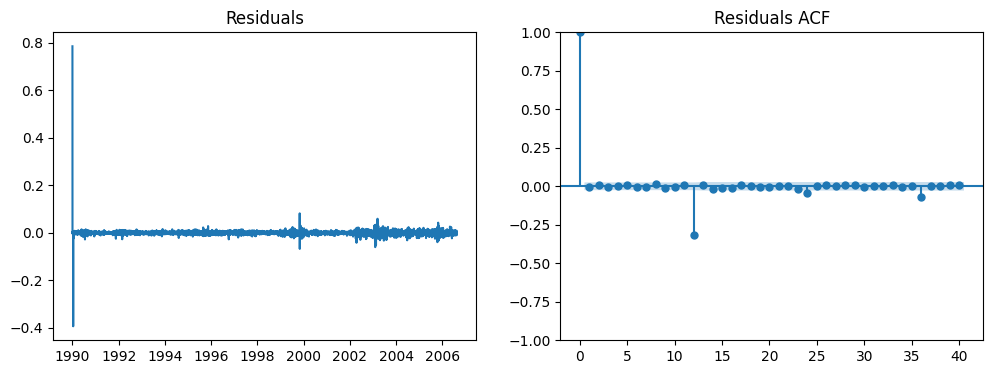

In [14]:
arima_train, arima_test, arima_forecast = arima_model_fitting(training_data=train)

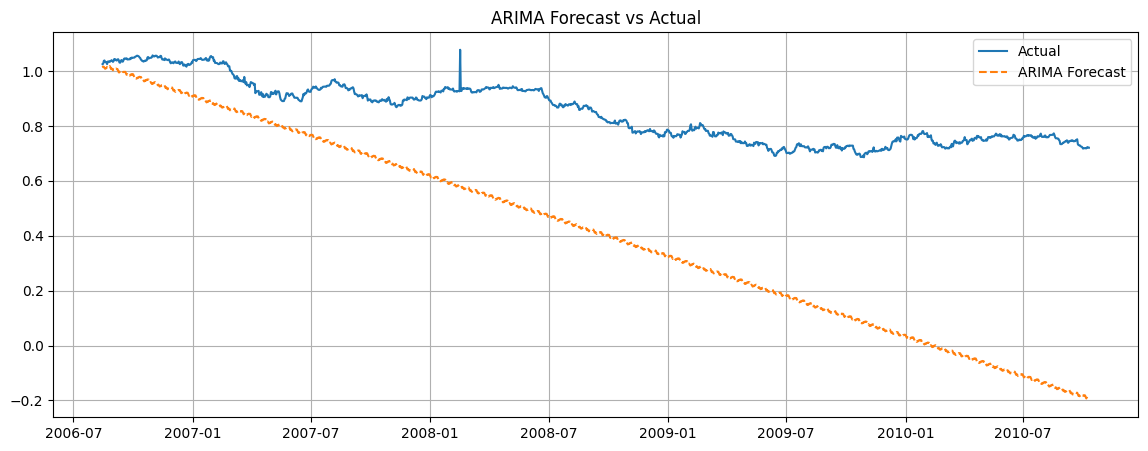

In [15]:
# ARIMA Forecast
plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
# Exponential Smoothing modelling with additive seasonality and additive trend
def exp_smoothing_modeling_add(training_data):
    
    # Fitting the Holt-Winters model with a  seasonal component
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365)
    model_fit = model.fit(optimized=True)
    
    # Forecasting
    forecast = model_fit.forecast(steps=len(test))
    return train, test, forecast


# Exponential Smoothing modelling with multiplicative seasonality and additive trend
def exp_smoothing_modeling_mul(training_data):
    
    # Fitting the Holt-Winters model with a  seasonal component
    model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=365)
    model_fit = model.fit(optimized=True)
    
    # Forecasting
    forecast = model_fit.forecast(steps=len(test))
    return train, test, forecast

In [18]:
es_add_train, es_add_test, es_add_forecast = exp_smoothing_modeling_add(train)
es_mul_train, es_mul_test, es_mul_forecast = exp_smoothing_modeling_mul(train)

/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/anurag_warthi/anaconda3/envs/new_environment/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
# Evaluating forecasts
def evaluate_forecasts(test, forecast, model_name):
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mape = np.mean(np.abs((test - forecast) / test)) * 100
    print(f'{model_name} Metrics:')
    print(f'MAE: {mae:.3f}')
    print(f'RMSE: {rmse:.3f}')
    print(f'MAPE: {mape:.3f}%')
    return mae, rmse, mape

In [21]:
#Evaluation and Comparison
print("\nARIMA Model Evaluation:")
arima_metrics = evaluate_forecasts(arima_test, arima_forecast, "ARIMA")


print("\nExponential Smoothing Model Evaluation:")
es_add_metrics = evaluate_forecasts(es_add_test, es_add_forecast, "Exponential Smoothing with Additive Seasonality")
print("\n")
es_mul_metrics = evaluate_forecasts(es_mul_test, es_mul_forecast, "Exponential Smoothing with Multiplicative Seasonality")


ARIMA Model Evaluation:
ARIMA Metrics:
MAE: 0.436
RMSE: 0.504
MAPE: 55.315%

Exponential Smoothing Model Evaluation:
Exponential Smoothing with Additive Seasonality Metrics:
MAE: 0.193
RMSE: 0.222
MAPE: 24.707%


Exponential Smoothing with Multiplicative Seasonality Metrics:
MAE: 0.204
RMSE: 0.235
MAPE: 26.110%


In [22]:
# Plotting forecasts
def plot_forecasts(train, test, arima_forecast, es_add_forecast):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Test Data', color='green')
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
    plt.plot(test.index, es_add_forecast, label='Exp Smoothing Forecast with Add Seasonality', color='blue')
    plt.title('Exchange Rate Forecast Comparison')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

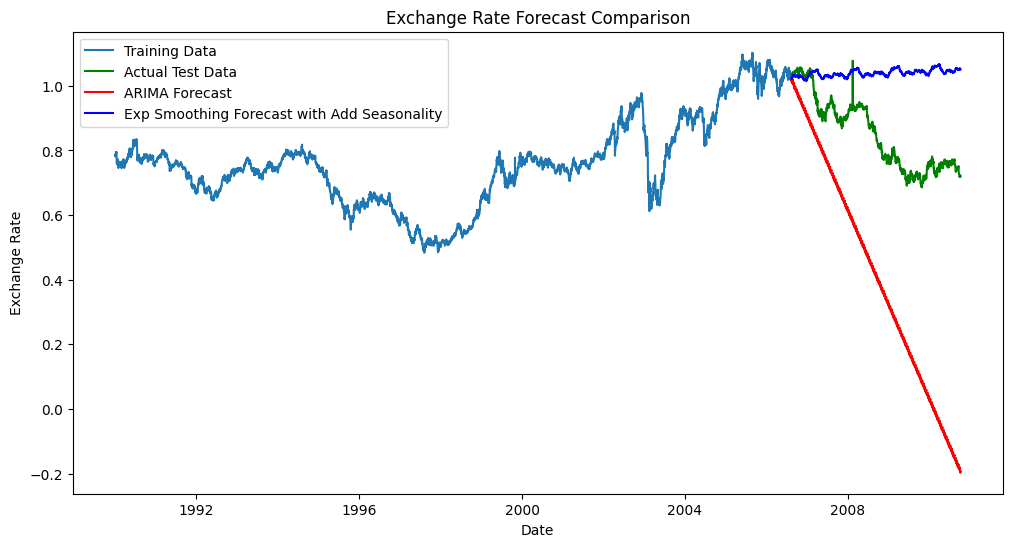

In [23]:
# Visualising forecasts
plot_forecasts(arima_train, arima_test, arima_forecast, es_add_forecast)

In [24]:
# Conclusion
print("\nModel Comparison and Conclusion:")
print("ARIMA model captures short-term dependencies but may struggle with long-term trends.")
print("Exponential Smoothing (Holt-Winters) better handles seasonality and trends.")
print("Based on error metrics, I choose the model with lower MAE, RMSE, and MAPE.")
print("For this dataset, Exponential Smoothing performed better due to potential seasonal patterns.")


Model Comparison and Conclusion:
ARIMA model captures short-term dependencies but may struggle with long-term trends.
Exponential Smoothing (Holt-Winters) better handles seasonality and trends.
Based on error metrics, I choose the model with lower MAE, RMSE, and MAPE.
For this dataset, Exponential Smoothing performed better due to potential seasonal patterns.
